In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from pyunicorn.timeseries import RecurrencePlot
import iberoSignalPro.preprocesa as ib
import ntwktools as nt

import logging
logging.basicConfig(level=logging.CRITICAL)

In [117]:
FILE_NAME = r"C:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\SeñalesProcesadas10Hz2\MauricioServin\S2\pasivoPre.csv"

#INPUT

selected_channels = [["C2", "C1", "FCz", "Cz", "Pz"],
                     ["Cz", "Oz", "C3", "FCz", "P3"],
                     ["C3", "FC4", "CP3", "P4"]]

#INPUT

#selected_channels = [["C3", "CP3", "C1", "Pz", "Oz", "C4", "CP4"],
#                       ["Oz", "C3", "P3", "FC4"],
#                      ["CP3", "P3", "C3", "C4", "C2", "P4"]]

#OUTPUT
#selected_channels = [["Cz", "C1", "C2", "P3"],
#                    ["FCz", "Oz", "P3", "CP4"],
#                    ["C1", "C2", "P4", "O2"]]

#BETE
#selected_channels = [["FC4", "Pz", "FCz", "C2"],
#                    ["Cz", "O2"],
#                    ["C2", "FC4", "CP3"]]

band = "mu"

if band == "mu":
    selected_channels = selected_channels[0]
elif band == "beta":
    selected_channels = selected_channels[1]
else:
    selected_channels = selected_channels[2]


In [118]:
data = pd.read_csv(FILE_NAME)
binary_signal = data["Binaria"]
selected_columns = [f"{band}_" + ch for ch in selected_channels]
data = data[selected_columns]
data = ib.normaliza(data, options="morum")
data.shape

(5, 3527)

In [119]:
data.shape

(5, 3527)

In [120]:
win_len = 40
recurrence_plots = []
binary_signal_2 = []

for i in range(0, len(binary_signal) - win_len, win_len):
    window_data = data[:,i:i + win_len].T
    binary_signal_2.append(binary_signal[i])
    rp = RecurrencePlot(
        window_data,
        threshold=0.25,
        tau=3,
        epsilon='distance',
        metric="manhattan"
    )
    recurrence_plots.append(rp)

Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the manhattan distance matrix...
Calculating recurrence plot at fixed threshold...


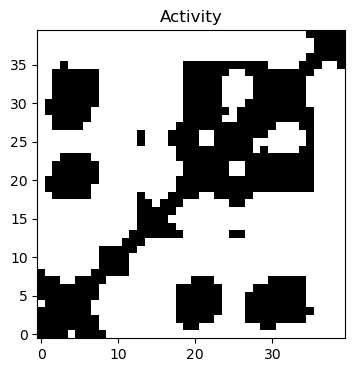

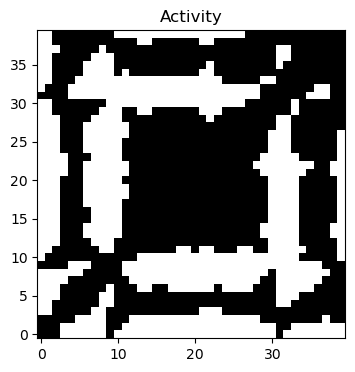

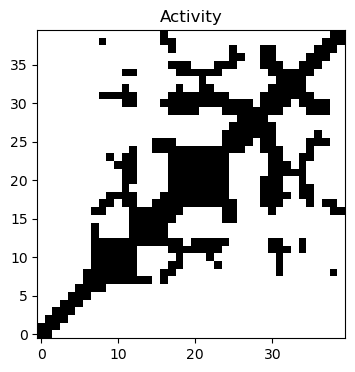

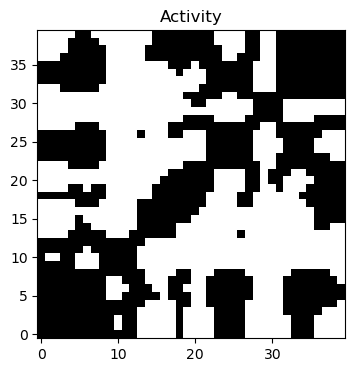

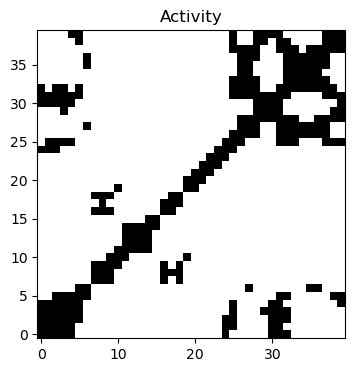

In [121]:
for i in range(0, len(recurrence_plots), 20):
    plt.figure(figsize= (4, 4))
    plt.imshow(recurrence_plots[i].recurrence_matrix(), cmap='binary', origin='lower')
    plt.title("Activity")


In [122]:

dict_ = {
    "recurrence_rate": [],
    "determinism": [],
    "laminarity": [],
    "trapping_time": [],
    "diag_entropy": [],
    "vert_entropy": [],
    "avg_diag_length": [],
    "average_vertlength": [],
    "average_white_vertlength": [],
    "max_diaglength": [],
    "max_vertlength": [],
    "max_white_vertlength": [],
    "mean_recurrence_time": [],
}

In [123]:
for rqa in recurrence_plots:
    dict_["recurrence_rate"].append(rqa.recurrence_rate())
    dict_["determinism"].append(rqa.determinism())
    dict_["laminarity"].append(rqa.laminarity())
    dict_["trapping_time"].append(rqa.trapping_time())
    dict_["diag_entropy"].append(rqa.diag_entropy())
    dict_["vert_entropy"].append(rqa.vert_entropy())
    dict_["avg_diag_length"].append(rqa.average_diaglength())
    dict_["average_vertlength"].append(rqa.average_vertlength())
    dict_["average_white_vertlength"].append(rqa.average_white_vertlength())
    dict_["max_diaglength"].append(rqa.max_diaglength())
    dict_["max_vertlength"].append(rqa.max_vertlength())
    dict_["max_white_vertlength"].append(rqa.max_white_vertlength())
    dict_["mean_recurrence_time"].append(rqa.mean_recurrence_time())


In [124]:
df = pd.DataFrame(dict_)
df.head()

,recurrence_rate,determinism,laminarity,trapping_time,diag_entropy,vert_entropy,avg_diag_length,average_vertlength,average_white_vertlength,max_diaglength,max_vertlength,max_white_vertlength,mean_recurrence_time
0,0.34250,0.944882,0.983577,6.125000,1.797296,2.205865,4.800000,6.125000,8.483871,39,18,36,8.483871
1,0.12500,0.712500,0.905000,3.016667,1.748155,1.311862,4.750000,3.016667,13.333333,13,7,35,13.333333
2,0.74875,0.979275,0.990818,10.321739,2.355738,2.793571,6.914634,10.321739,3.295082,39,39,15,3.295082
3,0.80750,0.971246,0.984520,12.000000,2.509273,2.788914,8.106667,12.000000,3.111111,39,37,13,3.111111
4,0.49750,0.912698,0.973618,5.698529,1.765554,2.310620,4.312500,5.698529,5.395973,39,21,23,5.395973


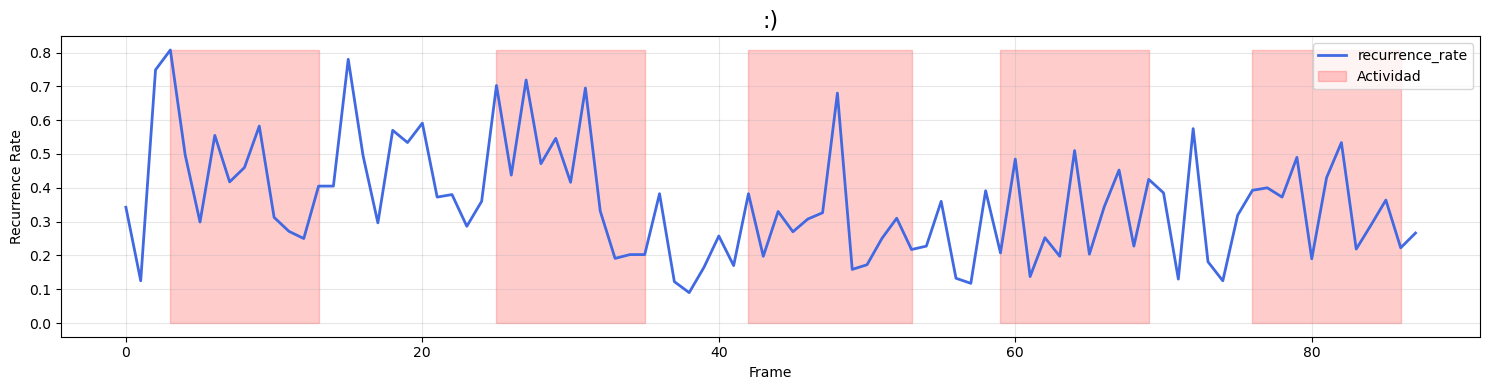

In [125]:
plt.figure(figsize=(15, 4))

# Plot de la señal continua
plt.plot(df["recurrence_rate"], label="recurrence_rate", linewidth=2, color='royalblue')

# Crear la "sombra binaria" como una franja de fondo
binary_signal_2 = np.array(binary_signal_2)
plt.fill_between(
    range(len(binary_signal_2)),
    0,  # desde cero
    df["recurrence_rate"].max(),  # hasta el máximo de la señal
    where=binary_signal_2 == 1,
    color='red',
    alpha=0.2,
    step='pre',
    label="Actividad"
)

plt.title(":)", fontsize=16)
plt.xlabel("Frame")
plt.ylabel("Recurrence Rate")
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()